# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Propiedades en venta</center>
### <center> Grupo 2</center>
##Integrantes:
*   Aramayo Carolina
*   Utrera Maximo Damian
*   Villalba Ana Daniela
*   Fiorilo Roy


#Importación de librerias

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split

#Lectura de archivo

In [ ]:
file_path = './dataset/properati_argentina_2021.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


#Análisis Exploratorio y Procesamiento de Datos
En esta sección vamos a filtrar y seleccionar los datos a trabajar a lo largo del proyecto.




####1) Filtrado
Se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

En la etapa de filtrado, vamos a utilizar la funcionalidad de `str.contains()` de pandas. Este código se basa en la documentación oficial de pandas que puedes encontrar en [este enlace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).


In [169]:
# filtro por tipo de propiedad
# str.contains() se utiliza para buscar patrones de texto dentro de las cadenas en una serie.
# USD: indica el patrón que busco
# case: no distingue entre mayúsculas y minúsculas
# na: no registro valores NaN
filtro = df.property_type.str.contains('Casa|PH|Departamento',case=False,na=False)
ds_propiedades_filtradas = df[filtro]

In [170]:
# filtro propiedades en Capital Federal
filtro = ds_propiedades_filtradas.place_l2.str.contains('Capital Federal',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [171]:
# filtro propiedades en venta
filtro = ds_propiedades_filtradas.operation.str.contains('Venta',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [172]:
# filtro por moneda DÓLAR
filtro = ds_propiedades_filtradas.property_currency.str.contains('USD',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [173]:
# DataSet filtrado
ds_propiedades_filtradas.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


####2) Entrenamiento y test
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

En esta sección se utiliza el método `train_test_split()` de Scikit-learn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Este método es útil para evaluar el rendimiento de un modelo de aprendizaje automático.

El método `train_test_split()` se puede encontrar en la documentación oficial de Scikit-learn:

- [train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Documentación de train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


In [174]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
prop_train, prop_test = train_test_split(ds_propiedades_filtradas, train_size=0.8)
print("Propiedades para entrenar:", len(prop_train))
print("Propiedades para testear:", len(prop_test))

Propiedades para entrenar: 75404
Propiedades para testear: 18852


##Exploración Inicial

## Visualización de los datos

##Datos Faltantes
En esta sección se va a realizar el análsis de la presencia de datos faltantes

###Análisis de datos faltantes a nivel columna

Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset.

In [175]:
ds_train = prop_train
ds_test = prop_test

In [176]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6', 'operation',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_currency', 'property_title'],
      dtype='object')

Para iniciar, vamos a analizar la cantidad de datos faltantes por columna y su porcentaje

In [177]:
filas,columnas = ds_train.shape
print("El dataset de entrenamiento tiene {} filas y {} columnas".format(filas,columnas))

El dataset de entrenamiento tiene 75404 filas y 20 columnas


Obtengo el promedio de cada columna que contiene datos nulos

In [178]:
promedio_datos_nulos = ds_train.isna().sum() / filas * 100
promedio_datos_nulos

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.967959
longitud                      3.967959
place_l2                      0.000000
place_l3                      0.444274
place_l4                     96.188531
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.112673
property_bedrooms            11.711580
property_surface_total        5.141637
property_surface_covered      3.510424
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64

Muestro la cantidad de datos nulos por columna

In [179]:
cant_datos_nulos = ds_train.isna().sum()
cant_datos_nulos

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                      2992
longitud                     2992
place_l2                        0
place_l3                      335
place_l4                    72530
place_l5                    75404
place_l6                    75404
operation                       0
property_type                   0
property_rooms                839
property_bedrooms            8831
property_surface_total       3877
property_surface_covered     2647
property_price                  0
property_currency               0
property_title                  0
dtype: int64

Grafico esta relación

<Axes: title={'center': 'Gráfico del promedio de datos nulos por columna'}, xlabel='columna', ylabel='promedio'>

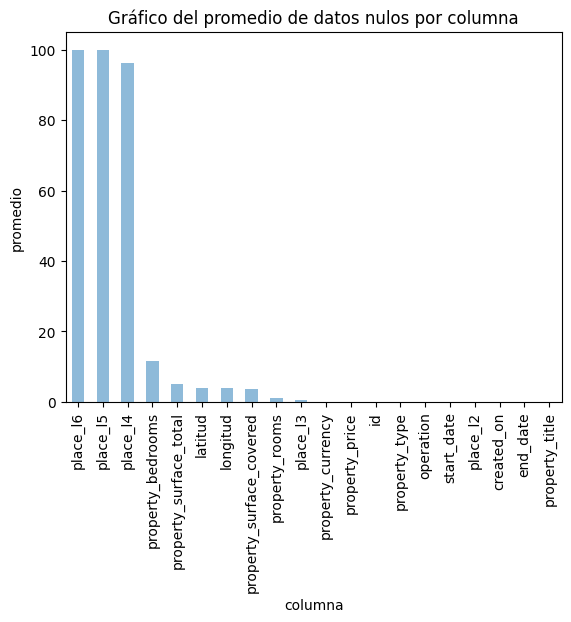

In [180]:
ds_porcentaje = promedio_datos_nulos
ds_porcentaje = ds_porcentaje.sort_values(ascending = False)
ds_porcentaje.plot.bar(alpha=0.5,title="Gráfico del promedio de datos nulos por columna", xlabel="columna" , ylabel="promedio")

Entonces los datos que debo analizar son:

In [181]:
promedio_datos_nulos.sort_values(ascending = False,inplace=True)
filtro = promedio_datos_nulos!=0
datos_nulos = promedio_datos_nulos[filtro]
datos_nulos

place_l6                    100.000000
place_l5                    100.000000
place_l4                     96.188531
property_bedrooms            11.711580
property_surface_total        5.141637
latitud                       3.967959
longitud                      3.967959
property_surface_covered      3.510424
property_rooms                1.112673
place_l3                      0.444274
dtype: float64

####Elimino places (place_l6, place_l5, place_l4)

Al ver el gráfico y el análisis previo de nulos. Puedo eliminar las columnas ```place_l6```, ```place_l5``` y ```place_l4```, pues tienen en su totalidad de datos nulos. El ```place_l4``` tiene casi su totalidad de nulos.

In [182]:
columnas = ['place_l6','place_l5','place_l4']
ds_train.drop(columns=columnas, inplace=True)
ds_test.drop(columns=columnas, inplace=True)

In [183]:
ds_train.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
135561,I2M3P7ziKULrgdRQQdG1zA==,2021-04-06,2021-04-06,2021-04-06,-34.613398,-58.359734,Capital Federal,Puerto Madero,Venta,Departamento,4.0,3.0,177.0,160.0,1090000.0,USD,Departamento - Puerto Madero
212392,chAg97IvgkC7KZysVit7SQ==,2021-03-22,2021-06-05,2021-03-22,NaN,NaN,Capital Federal,Nuñez,Venta,Departamento,2.0,1.0,52.0,43.0,159000.0,USD,Departamento - Nuñez
76742,9ZLzvsBvKN+KzpGkHDiAAw==,2021-07-17,2022-02-09,2021-07-17,-34.589424,-58.387241,Capital Federal,Recoleta,Venta,Departamento,3.0,2.0,132.0,112.0,379000.0,USD,VENTA - DEPTO 3 AMB. CON PARRILLA - RECOLETA
131299,Rr6d+kVVZ0Ox0BaLHXOngg==,2021-05-27,2021-08-11,2021-05-27,-34.603184,-58.418996,Capital Federal,Almagro,Venta,Departamento,1.0,NaN,33.0,25.0,59000.0,USD,Venta monoambiente con balcón terraza Apto prof
50515,nChv9T6LizWbx5XrcW22pw==,2021-06-23,2022-04-10,2021-06-23,-34.575225,-58.484258,Capital Federal,Villa Urquiza,Venta,Departamento,1.0,NaN,33.0,31.0,104900.0,USD,Venta - Departamento - Villa Urquiza - 1 ambie...


In [184]:
ds_test.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
172355,izgOIwTbpbv7MBzXf/Q1Jw==,2021-12-20,2022-01-27,2021-12-20,-34.564583,-58.477786,Capital Federal,Coghlan,Venta,Departamento,2.0,1.0,37.0,34.0,87000.0,USD,2 AMB C/vista a Piscina SUM Gym Parrilla / Gr...
364040,1NgtEvrnL2qVlsdz/dR+Cg==,2021-04-10,2021-06-05,2021-04-10,-34.602461,-58.400439,Capital Federal,Once,Venta,Departamento,1.0,NaN,40.0,40.0,42000.0,USD,Departamento - Once - Un ambiente - Apto profe...
17497,jEEYA+xr0eIbUaidJEV1pg==,2021-08-28,2021-08-31,2021-08-28,-34.579298,-58.434813,Capital Federal,Palermo,Venta,Departamento,1.0,NaN,64.0,45.0,179300.0,USD,DEPARTAMENTO MONO AMBIENTE CON BALCON Y AMPLIA...
143624,lUGz0veRV28/g6EEL8NjjQ==,2021-06-08,2021-09-11,2021-06-08,-34.611181,-58.361018,Capital Federal,Puerto Madero,Venta,Departamento,2.0,1.0,NaN,80.0,410000.0,USD,Departamento - Puerto Madero
244480,Ii4GOTaO2lotJJY2n2emhw==,2021-10-22,9999-12-31,2021-10-22,-34.624510,-58.466089,Capital Federal,Flores,Venta,Departamento,3.0,2.0,67.0,NaN,164000.0,USD,Departamento - Flores


####Latitud y longitud
Vamos a anlizar los nulos de estas dos variables

In [185]:
# establezco si son o no nulos
latatitud_longitud = ds_train[['latitud','longitud']].isna()
# creo filtro si son o no nulos
v_filtro_latitud =  latatitud_longitud['latitud']==True
f_filtro_latitud =  latatitud_longitud['latitud']==False
v_filtro_longitud =  latatitud_longitud['longitud']==True
f_filtro_longitud =  latatitud_longitud['longitud']==False
# establezco los nulos y no nulos
latatitud_longitud.loc[v_filtro_latitud, 'latitud'] = 'nulo'
latatitud_longitud.loc[f_filtro_latitud, 'latitud'] = 'no nulo'

# establezco los nulos y no nulos
latatitud_longitud.loc[v_filtro_longitud, 'longitud'] = 'nulo'
latatitud_longitud.loc[f_filtro_longitud, 'longitud'] = 'no nulo'

latatitud_longitud.head()


,latitud,longitud
135561,no nulo,no nulo
212392,nulo,nulo
76742,no nulo,no nulo
131299,no nulo,no nulo
50515,no nulo,no nulo


In [186]:
conteo_latitud = latatitud_longitud['latitud'].value_counts()
cant_nulos_latitud = conteo_latitud[0]
cant_no_nulos_latitud = conteo_latitud[1]
print("Cantidad de datos NULOS en latitud: {}".format(cant_nulos_latitud))
print("Cantidad de datos NO NULOS en latitud: {}".format(cant_no_nulos_latitud))

Cantidad de datos NULOS en latitud: 72412
Cantidad de datos NO NULOS en latitud: 2992


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable latitud'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

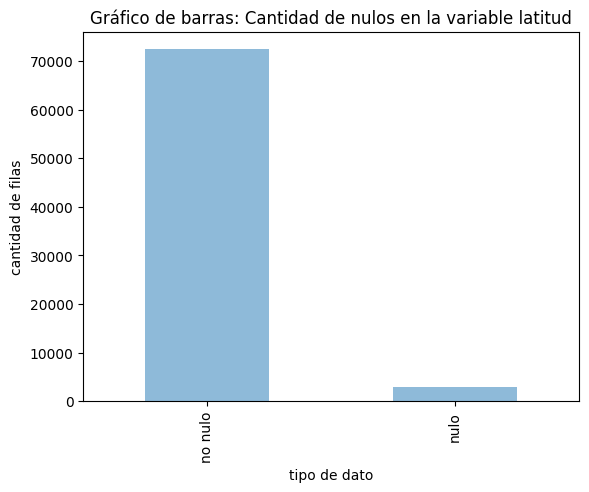

In [187]:
latatitud_longitud['latitud'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable latitud", xlabel="tipo de dato" , ylabel="cantidad de filas")

In [188]:
conteo_longitud = latatitud_longitud['longitud'].value_counts()
cant_nulos_longitud = conteo_longitud[0]
cant_no_nulos_longitud = conteo_longitud[1]
print("Cantidad de datos NULOS en longitud: {}".format(cant_nulos_longitud))
print("Cantidad de datos NO NULOS en longitud: {}".format(cant_no_nulos_longitud))

Cantidad de datos NULOS en longitud: 72412
Cantidad de datos NO NULOS en longitud: 2992


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable longitud'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

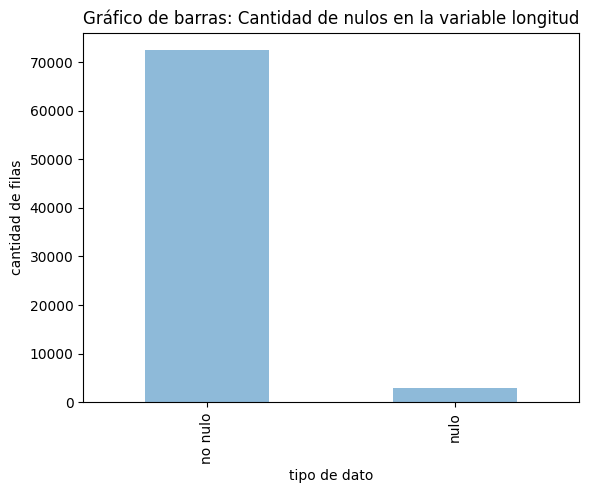

In [189]:
latatitud_longitud['longitud'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable longitud", xlabel="tipo de dato" , ylabel="cantidad de filas")

####Superficie total y Superficie cubierta (property_surface_total, property_surface_covered)

In [190]:
# establezco si son o no nulos
sup_total_cubierta = ds_train[['property_surface_total','property_surface_covered']].isna()
# creo filtro si son o no nulos
v_filtro_total =  sup_total_cubierta['property_surface_total']==True
f_filtro_total =  sup_total_cubierta['property_surface_total']==False
v_filtro_cubierto =  sup_total_cubierta['property_surface_covered']==True
f_filtro_cubierto =  sup_total_cubierta['property_surface_covered']==False
# establezco los nulos y no nulos
sup_total_cubierta.loc[v_filtro_total, 'property_surface_total'] = 'nulo'
sup_total_cubierta.loc[f_filtro_total, 'property_surface_total'] = 'no nulo'

# establezco los nulos y no nulos
sup_total_cubierta.loc[v_filtro_cubierto, 'property_surface_covered'] = 'nulo'
sup_total_cubierta.loc[f_filtro_cubierto, 'property_surface_covered'] = 'no nulo'

sup_total_cubierta.head()

,property_surface_total,property_surface_covered
135561,no nulo,no nulo
212392,no nulo,no nulo
76742,no nulo,no nulo
131299,no nulo,no nulo
50515,no nulo,no nulo


In [191]:
conteo_total = sup_total_cubierta['property_surface_total'].value_counts()
cant_nulos_total = conteo_total[0]
cant_no_nulos_total = conteo_total[1]
print("Cantidad de datos NULOS en property_surface_total: {}".format(cant_nulos_total))
print("Cantidad de datos NO NULOS en property_surface_total: {}".format(cant_no_nulos_total))

Cantidad de datos NULOS en property_surface_total: 71527
Cantidad de datos NO NULOS en property_surface_total: 3877


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_surface_total'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

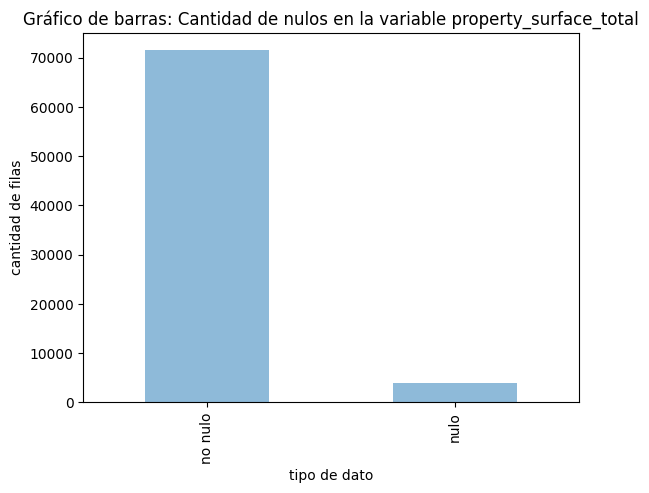

In [192]:
sup_total_cubierta['property_surface_total'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_surface_total", xlabel="tipo de dato" , ylabel="cantidad de filas")

In [193]:
conteo_cubierto = sup_total_cubierta['property_surface_covered'].value_counts()
cant_nulos_cubierto = conteo_cubierto[0]
cant_no_nulos_cubierto = conteo_cubierto[1]
print("Cantidad de datos NULOS en property_surface_covered: {}".format(cant_nulos_cubierto))
print("Cantidad de datos NO NULOS en property_surface_covered: {}".format(cant_no_nulos_cubierto))

Cantidad de datos NULOS en property_surface_covered: 72757
Cantidad de datos NO NULOS en property_surface_covered: 2647


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_surface_covered'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

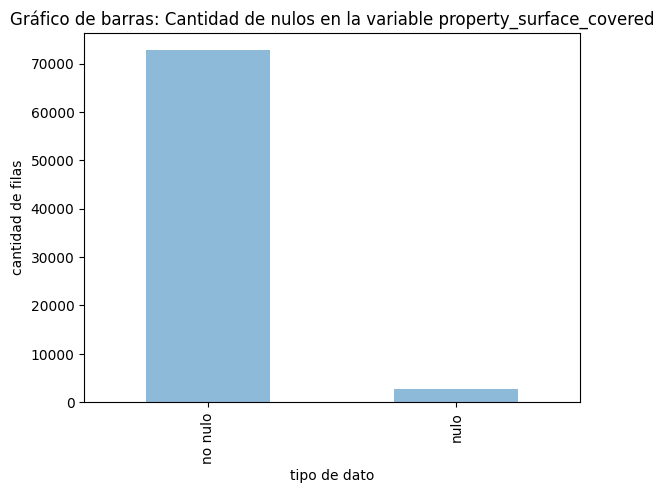

In [194]:
sup_total_cubierta['property_surface_covered'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_surface_covered", xlabel="tipo de dato" , ylabel="cantidad de filas")

####Habitaciones y dormitorios (property_rooms, property_bedrooms)

In [195]:
# establezco si son o no nulos
habitaciones_dormis = ds_train[['property_rooms','property_bedrooms']].isna()
# creo filtro si son o no nulos
v_filtro_hab =  habitaciones_dormis['property_rooms']==True
f_filtro_hab =  habitaciones_dormis['property_rooms']==False
v_filtro_dormis =  habitaciones_dormis['property_bedrooms']==True
f_filtro_dormis =  habitaciones_dormis['property_bedrooms']==False
# establezco los nulos y no nulos
habitaciones_dormis.loc[v_filtro_hab, 'property_rooms'] = 'nulo'
habitaciones_dormis.loc[f_filtro_hab, 'property_rooms'] = 'no nulo'

# establezco los nulos y no nulos
habitaciones_dormis.loc[v_filtro_dormis, 'property_bedrooms'] = 'nulo'
habitaciones_dormis.loc[f_filtro_dormis, 'property_bedrooms'] = 'no nulo'

habitaciones_dormis.head()

,property_rooms,property_bedrooms
135561,no nulo,no nulo
212392,no nulo,no nulo
76742,no nulo,no nulo
131299,no nulo,nulo
50515,no nulo,nulo


In [196]:
conteo_habitacion = habitaciones_dormis['property_rooms'].value_counts()
cant_nulos_habitacion = conteo_habitacion[0]
cant_no_nulos_habitacion = conteo_habitacion[1]
print("Cantidad de datos NULOS en property_rooms: {}".format(cant_nulos_habitacion))
print("Cantidad de datos NO NULOS en property_rooms: {}".format(cant_no_nulos_habitacion))

Cantidad de datos NULOS en property_rooms: 74565
Cantidad de datos NO NULOS en property_rooms: 839


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_rooms'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

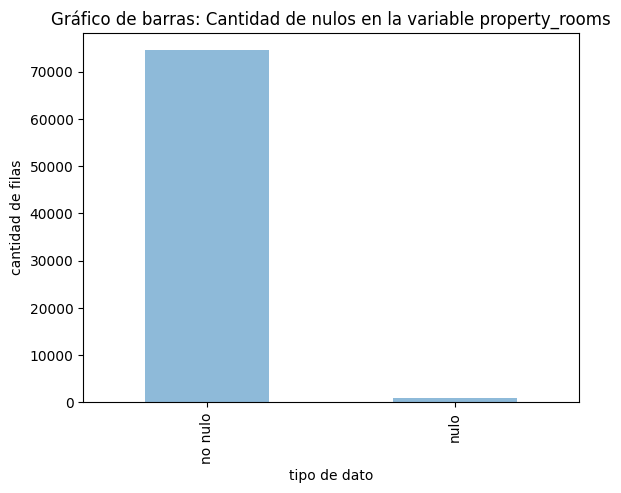

In [197]:
habitaciones_dormis['property_rooms'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_rooms", xlabel="tipo de dato" , ylabel="cantidad de filas")

In [198]:
conteo_dormis = habitaciones_dormis['property_bedrooms'].value_counts()
cant_nulos_dormis = conteo_dormis[0]
cant_no_nulos_dormis = conteo_dormis[1]
print("Cantidad de datos NULOS en property_bedrooms: {}".format(cant_nulos_dormis))
print("Cantidad de datos NO NULOS en property_bedrooms: {}".format(cant_no_nulos_dormis))

Cantidad de datos NULOS en property_bedrooms: 66573
Cantidad de datos NO NULOS en property_bedrooms: 8831


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_bedrooms'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

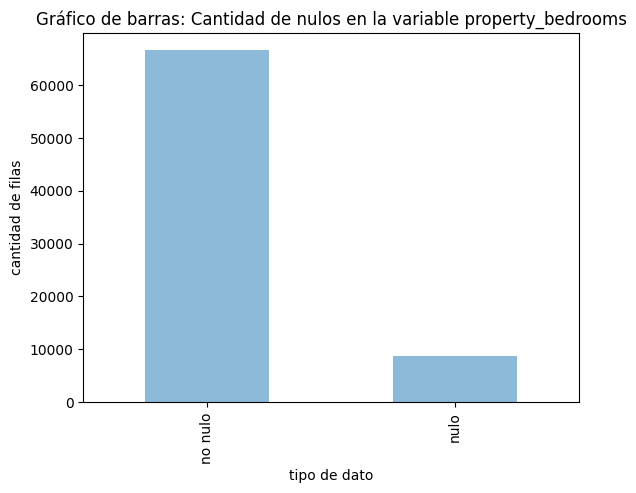

In [199]:
habitaciones_dormis['property_bedrooms'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_bedrooms", xlabel="tipo de dato" , ylabel="cantidad de filas")

####Barrio (place_l3)

In [200]:
# establezco si son o no nulos
barrio = ds_train['place_l3'].isna()
# creo filtro si son o no nulos
v_filtro_barrio =  barrio == True
f_filtro_barrio =  barrio == False
# establezco los nulos y no nulos
barrio.loc[v_filtro_barrio] = 'nulo'
barrio.loc[f_filtro_barrio] = 'no nulo'

barrio.head()

135561    no nulo
212392    no nulo
76742     no nulo
131299    no nulo
50515     no nulo
Name: place_l3, dtype: object

In [201]:
conteo_barrio = barrio.value_counts()
cant_nulos_barrio = conteo_barrio[0]
cant_no_nulos_barrio = conteo_barrio[1]
print("Cantidad de datos NULOS en place_l3: {}".format(cant_nulos_barrio))
print("Cantidad de datos NO NULOS en place_l3: {}".format(cant_no_nulos_barrio))

Cantidad de datos NULOS en place_l3: 75069
Cantidad de datos NO NULOS en place_l3: 335


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable place_l3'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

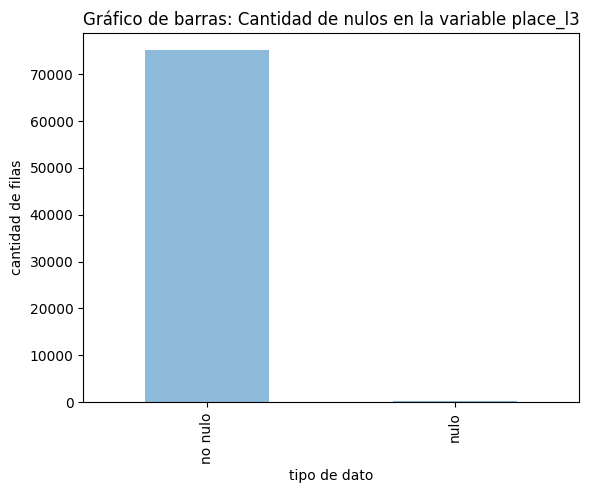

In [202]:
barrio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable place_l3", xlabel="tipo de dato" , ylabel="cantidad de filas")

###Análisis de datos faltantes a nivel fila

Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos
faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de
faltantes por fila en el dataset.


In [203]:
# Calcular la cantidad de filas nulas
cantidad_filas_nulas = ds_train.isna().sum(axis=1)
filtro = cantidad_filas_nulas > 0
cantidad_filas_nulas = cantidad_filas_nulas[filtro]
print("La cantidad de filas que tienen al menos un dato nulo es: ",len(cantidad_filas_nulas))

La cantidad de filas que tienen al menos un dato nulo es:  17140


<Axes: title={'center': 'Gráfico de barras: Cantidad de filas nulas en ds_train'}, xlabel='cantidad de nulos', ylabel='cantidad de filas'>

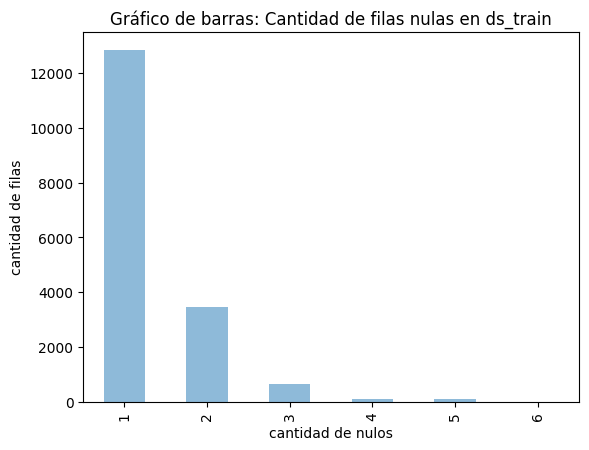

In [204]:
cantidad_filas_nulas.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de filas nulas en ds_train", xlabel="cantidad de nulos" , ylabel="cantidad de filas")

###Revisión de datos faltantes o mal ingresados

Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de
valores, eliminación de registros incompletos, etc.


Recordemos los datos nulos que tenemos en ds_train

In [205]:
datos_nulos

place_l6                    100.000000
place_l5                    100.000000
place_l4                     96.188531
property_bedrooms            11.711580
property_surface_total        5.141637
latitud                       3.967959
longitud                      3.967959
property_surface_covered      3.510424
property_rooms                1.112673
place_l3                      0.444274
dtype: float64

Como eliminamos las columnas ```place_l6```, ```place_l5``` y ```place_l4``` las descartamos de esta revisión.


Entonces debemos revisar los siguientes datos:
*     property_bedrooms
*     property_rooms
*     longitud
*     latitud
*     place_l3
*     property_surface_total
*     property_surface_covered

###Comparación de distribuciones
En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con
la distribución anterior a la imputación de los datos faltantes.


##Valores atípicos

# Resolución Roy de filtrado

In [ ]:
# SELECCIONAMOS LAS COLUMNAS QUE VAMOS A UTILIZAR(SON LAS QUE MAS NOS SIRVEN PARA ENCONTRAR LOS DATOS QUE BUSCAMOS)
dfFiltrado =df[["place_l2","place_l3","property_type","property_currency","operation","property_title"]]
dfFiltrado

,place_l2,place_l3,property_type,property_currency,operation,property_title
0,Neuquén,NaN,Casa,NaN,Venta,Casa - Capital
1,Montevideo,NaN,Casa,USD,Venta,Casa - Malvín
2,Entre Ríos,NaN,Casa,USD,Venta,Casa - Uruguay
3,Maldonado,NaN,Casa,USD,Venta,Casa - El Chorro
4,Neuquén,NaN,PH,USD,Venta,PH - Villa Farrell
...,...,...,...,...,...,...
460149,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,Local comercial,USD,Venta,LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-
460150,Bs.As. G.B.A. Zona Norte,General San Martín,Local comercial,USD,Venta,Nave Industrial - Villa Lynch
460151,Bs.As. G.B.A. Zona Norte,General San Martín,Local comercial,USD,Venta,importante edificio comercial en tres plantas ...
460152,Santa Fe,Villa Constitución,Local comercial,NaN,Alquiler,Local - Villa Constitucion


In [ ]:
# Filtramos las filas en las que el valor de la columna "property_currency" no sea igual a -1.
dfFiltrado["property_currency"] = dfFiltrado["property_currency"].fillna(-1)
dfFiltrado = dfFiltrado[dfFiltrado["property_currency"] != -1]

# Filtramos las filas en las que el valor de la columna "property_currency" no sea igual a -1.
dfFiltrado["operation"] = dfFiltrado["operation"].fillna(-1)
dfFiltrado = dfFiltrado[dfFiltrado["operation"] != -1]

# Filtramos las filas en las que el valor de la columna "property_type" no sea igual a -1.
dfFiltrado["property_type"] = dfFiltrado["property_type"].fillna(-1)
dfFiltrado = dfFiltrado[dfFiltrado["property_type"] != -1]

# Filtramos las filas en las que el valor de la columna "place_l2" no sea igual a -1.
dfFiltrado["place_l2"] = dfFiltrado["place_l2"].fillna(-1)
dfFiltrado = dfFiltrado[dfFiltrado["place_l2"] != -1]

#Basicamente lo que hice fue filtrar por todos los NaN que si son datos necesarios
dfFiltrado

,place_l2,place_l3,property_type,property_currency,operation,property_title
25,Capital Federal,NaN,Casa,USD,Venta,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,Capital Federal,Boca,Departamento,USD,Venta,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,Capital Federal,Boca,Departamento,USD,Venta,Departamento - 4 Ambientes - Catalinas Sur
49,Capital Federal,Once,Departamento,USD,Venta,Venta departamento 4 ambientes Once
51,Capital Federal,Boedo,PH,USD,Venta,PH - Boedo
...,...,...,...,...,...,...
460072,Capital Federal,Villa del Parque,Departamento,USD,Venta,Espectacular 4 amb130m2 con Balcon Terraza!!!
460073,Capital Federal,Villa del Parque,Departamento,USD,Venta,3 ambientes con cochera listo para habitar!
460074,Capital Federal,Villa del Parque,Departamento,USD,Venta,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
460075,Capital Federal,Villa del Parque,Departamento,USD,Venta,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


In [ ]:
dfFiltrado = dfFiltrado[dfFiltrado['property_currency'] == 'USD']
dfFiltrado = dfFiltrado[dfFiltrado['operation'] == 'Venta']
dfFiltrado = dfFiltrado[dfFiltrado['place_l2'] == 'Capital Federal']
valores_a_mantener = ['Casa', 'PH', 'Departamento']
dfFiltrado = dfFiltrado[dfFiltrado['property_type'].isin(valores_a_mantener)]
#Filtre por los valores que pide el enunciado USD, VENTA, CASA,PH, DEPARTAMENTO, CABA.
dfFiltrado

,place_l2,place_l3,property_type,property_currency,operation,property_title
25,Capital Federal,NaN,Casa,USD,Venta,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,Capital Federal,Boca,Departamento,USD,Venta,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,Capital Federal,Boca,Departamento,USD,Venta,Departamento - 4 Ambientes - Catalinas Sur
49,Capital Federal,Once,Departamento,USD,Venta,Venta departamento 4 ambientes Once
51,Capital Federal,Boedo,PH,USD,Venta,PH - Boedo
...,...,...,...,...,...,...
460072,Capital Federal,Villa del Parque,Departamento,USD,Venta,Espectacular 4 amb130m2 con Balcon Terraza!!!
460073,Capital Federal,Villa del Parque,Departamento,USD,Venta,3 ambientes con cochera listo para habitar!
460074,Capital Federal,Villa del Parque,Departamento,USD,Venta,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
460075,Capital Federal,Villa del Parque,Departamento,USD,Venta,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


Text(0, 0.5, 'Tipo de Propiedad')

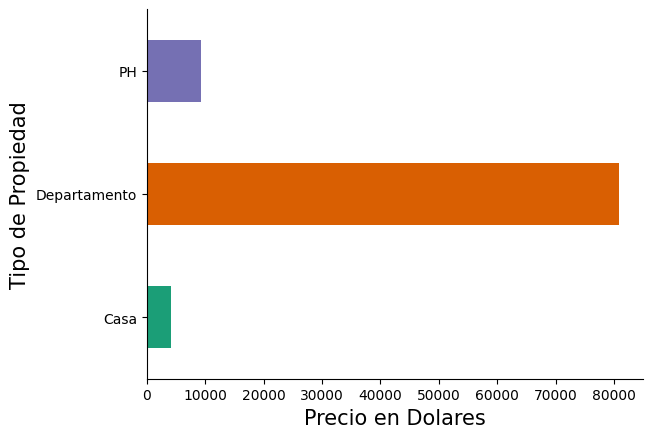

In [ ]:
# @title property_type
dfFiltrado.groupby('property_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Precio en Dolares", fontsize=15)
plt.ylabel("Tipo de Propiedad", fontsize=15)

owo